### Required Libraries

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Extraction

In [245]:
df_debit = pd.read_excel("Umsaetze.xlsx", header=1)

In [246]:
df_credit = pd.read_excel("Umsaetze_credit.xlsx", header = 1)

In [247]:
df_revolut = pd.read_excel("Umsaetze_revolut.xlsx", header = 1)

### Preprocessing

Preprocessing Debit file

In [248]:
df = df_debit

In [249]:
#removing unneccessary columns
df.drop(columns = df.columns[:5], inplace = True)
df.drop(columns = ["Bemerkung", "Steuerrelevant", "Glaeubiger ID", "Mandatsreferenz", "IBAN Zahlungsbeteiligter", "BIC (SWIFT-Code) Zahlungsbeteiligter", "Waehrung"], inplace = True)

In [250]:
#renaming columns
df.rename(columns = {"Name Zahlungsbeteiligter":"Name_Zahlungsbeteiligter", "Saldo nach Buchung":"Saldo_nach_Buchung"}, inplace = True)
df.head()

,Buchungstag,Valutadatum,Name_Zahlungsbeteiligter,Buchungstext,Verwendungszweck,Betrag,Saldo_nach_Buchung,Kategorie
0,30.06.2023,30.06.2023,Schwenke & Schütz,SEPA-UEBERWEISUNG,Matadori Vollmacht Az 161/23 S11 el SecureGo p...,-154.71,7335.63,Sonstige Ausgaben
1,29.06.2023,29.06.2023,Berliner Volksbank eG,BASISLASTSCH./EINZUG,MASTERCARD Abrechnung EREF: KKM100900007464660...,-340.77,7490.34,Kreditkartenabrechnung
2,26.06.2023,26.06.2023,Emanuela Mingo,DA-GUTSCHRIFT,MIETE LIETZENBURGER STR 3 EREF: ZV010035322831...,1100.00,7831.11,Miete & Pacht
3,22.06.2023,22.06.2023,Matadori GmbH,SEPA-UEBERWEISUNG,Gesellschaftsanteile Kap. Erhöhung SecureGo pl...,-4200.00,6731.11,Sonstige Ausgaben
4,22.06.2023,22.06.2023,Jaqueline Rosenkranz,GUTSCHRIFT,Geschenk,5000.00,10931.11,Geschenke


In [251]:
#change all to lowercase 
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

#applymap applies function to element. 
#isinstance checks for string

In [252]:
#sorted oldest to newest date
df= df.sort_values(by='Buchungstag', ascending=False)

In [253]:
#removing transactions to myself
df = df[df['Name_Zahlungsbeteiligter'] != 'talia rosenkranz']

In [254]:
df_debit = df 

Preprocessing Credit file

In [255]:
#removing unneccessary columns
df_credit.drop(columns = ["Name Zahlungsbeteiligter", "Bezeichnung Auftragskonto", "IBAN Auftragskonto","BIC Auftragskonto","Bankname Auftragskonto", "Bemerkung", "Steuerrelevant", "Glaeubiger ID", "Mandatsreferenz", "IBAN Zahlungsbeteiligter", "BIC (SWIFT-Code) Zahlungsbeteiligter", "Waehrung"], inplace = True)
#renaming columns
df_credit.rename(columns = {"Name Zahlungsbeteiligter":"Name_Zahlungsbeteiligter", "Saldo nach Buchung":"Saldo_nach_Buchung"}, inplace = True)
#change all to lowercase 
df_credit = df_credit.applymap(lambda x: x.lower() if isinstance(x, str) else x)
#sorted oldest to newest date
df_credit = df_credit.sort_values(by='Buchungstag', ascending=False)

Preprocessing Revolut file

In [256]:
df_revolut.head(10)

,Type,Product,Started Date,Completed Date,Description,Amount,Fee,Currency,State,Balance
0,FEE,Current,2023-04-22 16:00:28,2023-04-22 16:00:28,Card Delivery Fee,-19.99,0.0,EUR,COMPLETED,162.58
1,TOPUP,Current,2023-04-24 12:46:11,2023-04-24 12:46:11,Payment from Talia Rosenkranz,2000.00,0.0,EUR,COMPLETED,2162.58
2,CARD_PAYMENT,Current,2023-04-25 09:39:03,2023-04-26 01:12:30,Redelco Alimentos 0,-3.35,0.0,EUR,COMPLETED,2159.23
3,CARD_PAYMENT,Current,2023-04-26 20:05:33,2023-04-27 11:33:32,El Patio Juice Coff,-28.14,0.0,EUR,COMPLETED,2131.09
4,TRANSFER,Current,2023-04-27 15:12:50,2023-04-27 15:18:17,To DALINA LEILA FELICIA WEIDINGER,-410.00,0.0,EUR,COMPLETED,1721.09
5,CARD_PAYMENT,Current,2023-04-28 02:50:01,2023-04-29 01:29:07,Cantina Pelicano,-31.62,0.0,EUR,COMPLETED,1689.47
6,CARD_PAYMENT,Current,2023-05-03 17:54:16,2023-05-04 11:34:00,Las Deliciosas,-13.65,0.0,EUR,COMPLETED,1675.82
7,CARD_PAYMENT,Current,2023-05-04 14:16:36,2023-05-05 01:32:04,Telepizza,-2.71,0.0,EUR,COMPLETED,1673.11
8,CARD_PAYMENT,Current,2023-05-04 14:35:39,2023-05-05 01:32:04,Santiago International Airport,-2.25,0.0,EUR,COMPLETED,1670.86
9,CARD_PAYMENT,Current,2023-05-04 01:02:38,2023-05-05 01:32:05,Redelco El Deseo Spa,-18.67,0.0,EUR,COMPLETED,1652.19


In [257]:
df_revolut.columns

Index(['Type', 'Product', 'Started Date', 'Completed Date', 'Description',
       'Amount', 'Fee', 'Currency', 'State', 'Balance'],
      dtype='object')

In [258]:
#making sure no other currencys there
df_revolut[df_revolut["Currency"]!= "EUR"]

,Type,Product,Started Date,Completed Date,Description,Amount,Fee,Currency,State,Balance


In [259]:
#removing unneccessary columns
df_revolut.drop(columns = ["Product", "Fee","State","Currency"], inplace = True)
#renaming columns
df_revolut["Name_Zahlungsbeteiligter"]=df_revolut["Description"]
df_revolut.rename(columns = {"Type":"Buchungstext", "Started Date":"Buchungstag", "Completed Date":"Valutadatum","Description":"Verwendungszweck","Amount":"Betrag", "Currency":"Waehrung", "Balance":"Saldo_nach_Buchung"}, inplace = True)
#change all to lowercase 
df_revolut = df_revolut.applymap(lambda x: x.lower() if isinstance(x, str) else x)
#sorted oldest to newest date
df_revolut = df_revolut.sort_values(by='Buchungstag', ascending=False)

In [260]:
df_revolut

,Buchungstext,Buchungstag,Valutadatum,Verwendungszweck,Betrag,Saldo_nach_Buchung,Name_Zahlungsbeteiligter
218,card_payment,2023-07-27 06:51:47,2023-07-30 15:51:39,tel aviv center,-6.62,158.29,tel aviv center
216,topup,2023-07-24 19:27:09,2023-07-24 19:27:13,apple pay top-up by *9397,100.00,166.41,apple pay top-up by *9397
217,card_payment,2023-07-24 04:44:53,2023-07-25 04:42:29,heinemann duty-free,-1.50,164.91,heinemann duty-free
213,card_payment,2023-07-21 12:51:00,2023-07-22 05:41:47,kosher4all,-3.50,92.76,kosher4all
214,card_payment,2023-07-21 12:09:57,2023-07-22 13:27:43,sheriffs beef nah & frisch supermarkt,-5.35,87.41,sheriffs beef nah & frisch supermarkt
215,card_payment,2023-07-21 11:28:47,2023-07-22 14:57:06,shiso burger,-21.00,66.41,shiso burger
211,card_payment,2023-07-19 12:28:58,2023-07-20 01:45:37,idee.,-47.94,100.46,idee.
212,card_payment,2023-07-19 11:17:32,2023-07-20 10:29:14,lami s,-4.20,96.26,lami s
207,card_payment,2023-07-17 13:28:19,2023-07-18 11:25:37,özels apotheken,-12.97,166.45,özels apotheken
208,card_payment,2023-07-17 07:02:33,2023-07-18 14:11:32,öbb,-14.90,151.55,öbb


In [261]:
df_revolut.isnull().sum()

Buchungstext                0
Buchungstag                 0
Valutadatum                 0
Verwendungszweck            0
Betrag                      0
Saldo_nach_Buchung          0
Name_Zahlungsbeteiligter    0
dtype: int64

Concatinating all files to one df

In [262]:
df = pd.concat([df_debit, df_credit], axis=0)
df

,Buchungstag,Valutadatum,Name_Zahlungsbeteiligter,Buchungstext,Verwendungszweck,Betrag,Saldo_nach_Buchung,Kategorie
14,31.05.2023,31.05.2023,paypal europe s.a.r.l. et cie s.c.a,gutschrift,". airgsm pte. ltd., ihr einkauf bei airgsm pte...",16.75,4443.40,selbstständigkeit
15,31.05.2023,31.05.2023,berliner volksbank eg,basislastsch./einzug,mastercard abrechnung eref: kkm100900007464660...,-1192.50,4426.65,kreditkartenabrechnung
0,30.06.2023,30.06.2023,schwenke & schütz,sepa-ueberweisung,matadori vollmacht az 161/23 s11 el securego p...,-154.71,7335.63,sonstige ausgaben
16,30.05.2023,29.05.2023,emanuela mingo,da-gutschrift,miete lietzenburger str 3 eref: zv010035268240...,1100.00,5619.15,miete & pacht
1,29.06.2023,29.06.2023,berliner volksbank eg,basislastsch./einzug,mastercard abrechnung eref: kkm100900007464660...,-340.77,7490.34,kreditkartenabrechnung
2,26.06.2023,26.06.2023,emanuela mingo,da-gutschrift,miete lietzenburger str 3 eref: zv010035322831...,1100.00,7831.11,miete & pacht
28,26.04.2023,26.04.2023,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,1026612130524 . hansemerkur versicherungen gb...,-155.40,6349.75,sonstiger versand- & onlinehandel
27,26.04.2023,26.04.2023,"paypal (europe) s.a r.l. et cie, s.c.a.",basislastsch./einzug,"1026602290793 pp.1548.pp . , ihr einkauf bei e...",-10.00,6339.75,sonstiger versand- & onlinehandel
26,26.04.2023,26.04.2023,metropolitan pharmacy,kartenzahlung girocard,metropolitan pharmacy/frankfurt/de ...,-26.95,6312.80,apotheke
35,25.04.2023,25.04.2023,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,"1026568210959 pp.1548.pp . , ihr einkauf bei e...",-56.00,6757.24,sonstiger versand- & onlinehandel


In [263]:
df['Name_Zahlungsbeteiligter'] = df['Name_Zahlungsbeteiligter'].fillna("credit card")

In [264]:
df.isnull().sum()

Buchungstag                 0
Valutadatum                 0
Name_Zahlungsbeteiligter    0
Buchungstext                0
Verwendungszweck            0
Betrag                      0
Saldo_nach_Buchung          0
Kategorie                   0
dtype: int64

In [265]:
#adding revolut file to other df
df = pd.concat([df, df_revolut], axis = 0)
df

,Buchungstag,Valutadatum,Name_Zahlungsbeteiligter,Buchungstext,Verwendungszweck,Betrag,Saldo_nach_Buchung,Kategorie
14,31.05.2023,31.05.2023,paypal europe s.a.r.l. et cie s.c.a,gutschrift,". airgsm pte. ltd., ihr einkauf bei airgsm pte...",16.75,4443.40,selbstständigkeit
15,31.05.2023,31.05.2023,berliner volksbank eg,basislastsch./einzug,mastercard abrechnung eref: kkm100900007464660...,-1192.50,4426.65,kreditkartenabrechnung
0,30.06.2023,30.06.2023,schwenke & schütz,sepa-ueberweisung,matadori vollmacht az 161/23 s11 el securego p...,-154.71,7335.63,sonstige ausgaben
16,30.05.2023,29.05.2023,emanuela mingo,da-gutschrift,miete lietzenburger str 3 eref: zv010035268240...,1100.00,5619.15,miete & pacht
1,29.06.2023,29.06.2023,berliner volksbank eg,basislastsch./einzug,mastercard abrechnung eref: kkm100900007464660...,-340.77,7490.34,kreditkartenabrechnung
2,26.06.2023,26.06.2023,emanuela mingo,da-gutschrift,miete lietzenburger str 3 eref: zv010035322831...,1100.00,7831.11,miete & pacht
28,26.04.2023,26.04.2023,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,1026612130524 . hansemerkur versicherungen gb...,-155.40,6349.75,sonstiger versand- & onlinehandel
27,26.04.2023,26.04.2023,"paypal (europe) s.a r.l. et cie, s.c.a.",basislastsch./einzug,"1026602290793 pp.1548.pp . , ihr einkauf bei e...",-10.00,6339.75,sonstiger versand- & onlinehandel
26,26.04.2023,26.04.2023,metropolitan pharmacy,kartenzahlung girocard,metropolitan pharmacy/frankfurt/de ...,-26.95,6312.80,apotheke
35,25.04.2023,25.04.2023,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,"1026568210959 pp.1548.pp . , ihr einkauf bei e...",-56.00,6757.24,sonstiger versand- & onlinehandel


In [324]:
#changing dtype of dates column 
df.loc[:, 'Buchungstag'] = pd.to_datetime(df['Buchungstag']).dt.date
df.loc[:,'Valutadatum'] = pd.to_datetime(df['Valutadatum']).dt.date

In [331]:
start_date = pd.to_datetime("2023-04-23").date()
end_date = pd.to_datetime("2023-07-02").date()

df = df[(df["Buchungstag"] > start_date) & (df["Buchungstag"] <= end_date)]

In [336]:
df.dtypes

Buchungstag                  object
Valutadatum                  object
Name_Zahlungsbeteiligter     object
Buchungstext                 object
Verwendungszweck             object
Betrag                      float64
Saldo_nach_Buchung          float64
Kategorie                    object
dtype: object

In [326]:
df = df.sort_values("Buchungstag", ascending = True)

In [327]:
df= df[~df.index.duplicated(keep='first')]

In [312]:
food_cat = ["mercadopago", "express", "cafe","dabosh", "rest don juan", "feinkost", "dalal", "juice", "cantina","sumup", 
            "bar","bistro","pizz","food","thai","burger", "pasta", "rappi", 
            "birra house", "starbucks","eric kayser","la estrella", "soc ramirez",
            "super muffato boicy","cafe", "mercado", "coffee", "rest","fogo botafogo",
            "rancho de canoa", "oia", "redelco", "deliciosas","airport","el deseo", "dezato",
            "soppelsa dante", "linier", "m&p", "pipoque", "jumbo","padaria", "lj","mcstrada"]
accomodations = ["casavoyage", "hilton", "selina", "hostel", "hotel", "petrobras", "pao", "josubi", "av.", "pag hotelplaza"]
pharmacy = ["salcobrand avda. c. c"]
transportation = ["cabify", "bus","eucard", "auto","aerolineas","posto","1001" ]
activities = ["mercadopago","getyourguide", "pantanal sul turismo", "pag floripasurfclubsu", "costanera center", "pampa expedition", 
              "punta arenas centro","the singular patagonia", "lydia", "costa industria"]
extras = ["haulmer triptur", "dayana", "maria","marina", "prainha", "mormaii", "point", 
         "princesa", "litori armacao dos buz", "res", "pag"]

In [313]:
# Labeling Categories
for index, row in df.iterrows():
    for word in food_cat:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'essen'
            break
    for word in accomodations:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'unterkunft'
            break
    for word in pharmacy:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'apotheke'
            break
    for word in transportation:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'transport'
            break
    for word in activities:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'aktivitäten'
            break
    for word in extras:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'extras'
            break

In [314]:
for index, row in df.iterrows():
    if "topup" in row['Buchungstext']:
            df.at[index, 'Kategorie'] = 'top up'
    elif "card_refund" in row["Buchungstext"]:
        df.at[index, 'Kategorie'] = 'erstattung'
    elif "sonstiger%" in row ["Kategorie"]:
        df.at[index, 'Kategorie'] = 'extras'
    else:
        pass


In [315]:
#dropping irrelevant or redundant rows
df = df[
    (df["Name_Zahlungsbeteiligter"] != "to dalina leila felicia weidinger") &
    (df["Name_Zahlungsbeteiligter"] != "chile") &
    (df["Name_Zahlungsbeteiligter"] != "cash at chile 1124") &
    (df["Verwendungszweck"] != "rebar")&
    (df["Kategorie"]!="sonstiges")&
    (df["Kategorie"] != "sonstige girocardzahlungen")
]

In [316]:
df.isnull().sum()

Buchungstag                 0
Valutadatum                 0
Name_Zahlungsbeteiligter    0
Buchungstext                0
Verwendungszweck            0
Betrag                      0
Saldo_nach_Buchung          0
Kategorie                   0
dtype: int64

In [317]:
df[df["Kategorie"].isna()]

,Buchungstag,Valutadatum,Name_Zahlungsbeteiligter,Buchungstext,Verwendungszweck,Betrag,Saldo_nach_Buchung,Kategorie


In [318]:
df.Kategorie.unique()

array(['top up', 'essen', 'unterkunft', 'extras', 'apotheke',
       'drogeriemarkt', 'transport', 'aktivitäten', 'erstattung'],
      dtype=object)

In [409]:
wrong_classified_activ = ["haulmer triptur", "pag floripasurfclubsu"]
wrong_classified_food = ["pag cafecultura", "mercadopago maldito 1942", "pag zerohoralanches", "pag mauroalonsocoutin", "rest don juan"]
wrong_classified_transp = ["merpago brivalspa", "prainha agencia de vi"]
wrong_classified_accom = ["pag hotelplaza"]
finance = ["pag mepayfinancial"]


for index, row in df.iterrows():
    for word in wrong_classified_activ:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'aktivitäten'
    for word in wrong_classified_food:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'essen'
    for word in wrong_classified_transp:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'transport'   
    for word in finance:
        if word in row['Verwendungszweck']:
            df.at[index, 'Kategorie'] = 'Finanzen'   

In [410]:
df[df["Kategorie"] == "extras"]

,Buchungstag,Valutadatum,Name_Zahlungsbeteiligter,Buchungstext,Verwendungszweck,Betrag,Saldo_nach_Buchung,Kategorie
34,2023-04-25,2023-04-25,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,"1026590717741 pp.1548.pp . airgsm pte. ltd., i...",-17.14,6740.10,extras
35,2023-04-25,2023-04-25,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,"1026568210959 pp.1548.pp . , ihr einkauf bei e...",-56.00,6757.24,extras
36,2023-04-25,2023-04-25,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,"1026568606384 pp.1548.pp . , ihr einkauf bei e...",-10.00,6813.24,extras
28,2023-04-26,2023-04-26,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,1026612130524 . hansemerkur versicherungen gb...,-155.40,6349.75,extras
58,2023-05-18,2023-05-21,mercadopago marianore1942,card_payment,mercadopago marianore1942,-11.93,1539.04,extras
57,2023-05-19,2023-05-21,mercadopago mariajaria,card_payment,mercadopago mariajaria,-1.61,1551.09,extras
78,2023-05-29,2023-05-30,hym marina arauco,card_payment,hym marina arauco,-23.27,1154.04,extras
106,2023-06-14,2023-06-15,pag hotelplaza,card_payment,pag hotelplaza,-28.56,762.28,extras
112,2023-06-15,2023-06-16,pag maderoburger,card_payment,pag maderoburger,-7.30,727.26,extras
108,2023-06-15,2023-06-16,express divino cafe,card_payment,express divino cafe,-3.24,744.65,extras


In [411]:
df[df["Kategorie"].isna()]

,Buchungstag,Valutadatum,Name_Zahlungsbeteiligter,Buchungstext,Verwendungszweck,Betrag,Saldo_nach_Buchung,Kategorie


In [412]:
pd.set_option('display.max_rows', None)

## Analysis

In [413]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 192
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Buchungstag               182 non-null    object 
 1   Valutadatum               182 non-null    object 
 2   Name_Zahlungsbeteiligter  182 non-null    object 
 3   Buchungstext              182 non-null    object 
 4   Verwendungszweck          182 non-null    object 
 5   Betrag                    182 non-null    float64
 6   Saldo_nach_Buchung        182 non-null    float64
 7   Kategorie                 182 non-null    object 
dtypes: float64(2), object(6)
memory usage: 16.9+ KB


In [585]:
df.describe()

,Betrag,Saldo_nach_Buchung
count,182.000000,182.000000
mean,-1.578791,1228.447418
std,161.064022,1427.478523
min,-251.160000,-1825.640000
25%,-20.800000,620.020000
50%,-9.105000,907.070000
75%,-2.860000,1525.580000
max,2000.000000,6813.240000


In [586]:
cat_sum = df.groupby("Kategorie").sum()
cat_sum

,Betrag,Saldo_nach_Buchung
Kategorie,,
Finanzen,-50.89,3891.83
aktivitäten,-647.80,12501.38
apotheke,-78.47,14159.48
drogeriemarkt,-19.30,6720.80
erstattung,310.23,14151.30
essen,-851.71,69124.01
extras,-479.56,40324.75
top up,2967.90,4781.85
transport,-511.44,21223.13


In [416]:
#removing positve values as they don't belong to expenses
cat_sum = cat_sum[cat_sum["Betrag"] < 0]
cat_sum

,Betrag,Saldo_nach_Buchung
Kategorie,,
Finanzen,-50.89,3891.83
aktivitäten,-647.80,12501.38
apotheke,-78.47,14159.48
drogeriemarkt,-19.30,6720.80
essen,-851.71,69124.01
extras,-479.56,40324.75
transport,-511.44,21223.13
unterkunft,-926.30,36698.90


In [587]:
total_expenses = df[df["Betrag"] < 0]["Betrag"].sum()
print("total expenses:", total_expenses)


total expenses: -3565.4700000000003


In [418]:
expenses_per_week = total_expenses/10
expenses_per_month = total_expenses/2.5
print("expenses_per_week:", expenses_per_week)
print("expenses_per_month:", expenses_per_month)

expenses_per_week: -356.547
expenses_per_month: -1426.188


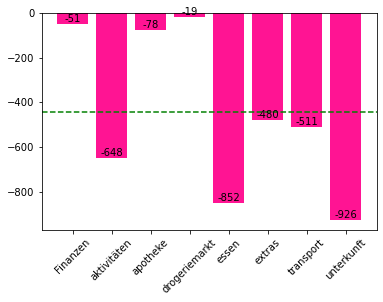

In [419]:
plt.bar(cat_sum.index, cat_sum["Betrag"],color='#FF1493', label='Data Points' )
#plt.xlabel("Kategorien")
#plt.ylabel("Sumed expense in Euro")
#plt.title("Sum of expenses per category")
plt.xticks(rotation=45)
average_value = cat_sum["Betrag"].mean() 
# Add a horizontal line for the average
plt.axhline(y=average_value, color='green', linestyle='--', label='Average')
# Add values inside the bars
for index, value in enumerate(cat_sum["Betrag"]):
    rounded_value = round(value)
    plt.text(index, rounded_value, str(rounded_value), ha='center', va='bottom', fontsize=10)
plt.show()

#### Spending trend over day

In [432]:
df['erstattung'].unique()

array(['top up', 'drogeriemarkt', 'extras', 'essen', 'apotheke',
       'unterkunft', 'transport', 'aktivitäten', 'erstattung', 'Finanzen'],
      dtype=object)

In [447]:
df_expenses = df[(df['Kategorie']!= 'erstattung') & (df['Kategorie']!= 'top up')]
df_expenses

,Buchungstag,Valutadatum,Name_Zahlungsbeteiligter,Buchungstext,Verwendungszweck,Betrag,Saldo_nach_Buchung,Kategorie
33,2023-04-25,2023-04-25,dm drogeriemarkt sagt danke,kartenzahlung girocard,dm fil.1212 h:65205/frankfurt/de ...,-19.30,6720.80,drogeriemarkt
34,2023-04-25,2023-04-25,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,"1026590717741 pp.1548.pp . airgsm pte. ltd., i...",-17.14,6740.10,extras
2,2023-04-25,2023-04-26,redelco alimentos 0,card_payment,redelco alimentos 0,-3.35,2159.23,essen
32,2023-04-25,2023-04-25,meyer feinkost airport gmbh,kartenzahlung girocard,meyer feinkost airport gmbh gir 69084862/frank...,-15.95,6704.85,essen
30,2023-04-25,2023-04-25,grueneburg-apotheke,kartenzahlung girocard,grueneburg-apotheke/frankfurt am main/de ...,-42.30,6656.75,apotheke
35,2023-04-25,2023-04-25,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,"1026568210959 pp.1548.pp . , ihr einkauf bei e...",-56.00,6757.24,extras
36,2023-04-25,2023-04-25,paypal europe s.a.r.l. et cie s.c.a,basislastsch./einzug,"1026568606384 pp.1548.pp . , ihr einkauf bei e...",-10.00,6813.24,extras
20,2023-04-25,2023-04-24,credit card,basislastsch./einzug,dalal isr tel aviv yaf ...,-8.31,-1795.73,essen
19,2023-04-25,2023-04-24,credit card,basislastsch./einzug,dabosh tel aviv isr tel aviv ...,-16.36,-1812.09,essen
17,2023-04-25,2023-04-24,credit card,basislastsch./einzug,25hours hotel berlin deu berlin ...,-6.00,-1825.64,unterkunft


In [511]:

df_trend = df_expenses.groupby("Buchungstag").sum()['Betrag'].reset_index()
df_trend.head()

,Buchungstag,Betrag
0,2023-04-25,-352.84
1,2023-04-26,-220.49
2,2023-04-28,-31.62
3,2023-05-03,-27.17
4,2023-05-04,-119.01


In [505]:
#finding days with extreme values
max_point = df_trend[df_trend["Betrag"] == df_trend["Betrag"].min()]
min_point = df_trend[df_trend["Betrag"] == df_trend["Betrag"].max()]
#find extreme points (negative values therefore max and min might seem wrong at first)

In [506]:
max_point

,Buchungstag,Betrag
0,2023-04-25,-352.84


In [507]:
min_point

,Buchungstag,Betrag
8,2023-05-12,-2.89


In [488]:
av_expense = df_trend["Betrag"].mean()

In [489]:
av_expense

-75.86106382978726

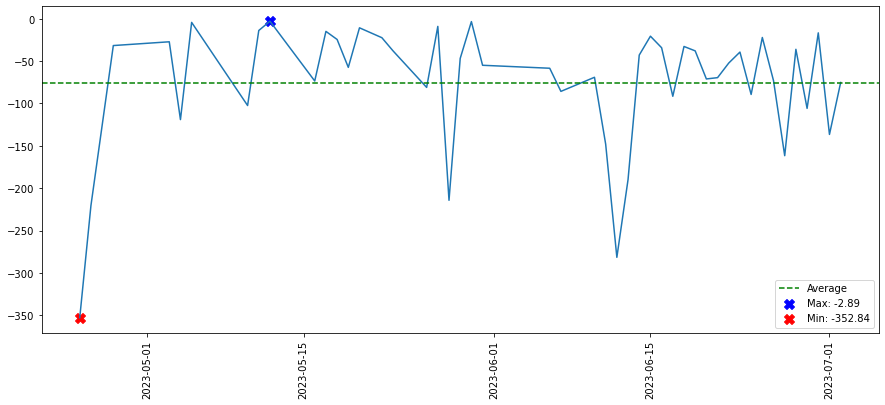

In [498]:
plt.figure(figsize = (15,6))
plt.plot(df_trend["Buchungstag"],df_trend["Betrag"])
plt.scatter(max_point["Buchungstag"], max_point["Betrag"], color='blue', marker='X', s=100, label=f'Max: {max_point["Betrag"].values[0]}')
plt.scatter(min_point["Buchungstag"], min_point["Betrag"], color='red',  marker='X', s=100, label=f'Min: {min_point["Betrag"].values[0]}')
plt.axhline(y=av_expense, color='green', linestyle='--', label='Average')

plt.legend()
plt.xticks(rotation = 'vertical')
plt.show()

The average daily spending value is not an accurate representation of the spending habit, so I will drop the outliers.

In [541]:
from scipy import stats
z_scores = stats.zscore(df_trend['Betrag'])
threshold = 1
df_no_outliers = df_trend[(z_scores < threshold) & (z_scores > -threshold)]
df_no_outliers.head()

,Buchungstag,Betrag
2,2023-04-28,-31.62
3,2023-05-03,-27.17
4,2023-05-04,-119.01
6,2023-05-10,-102.39
7,2023-05-11,-13.84


In [542]:
max_point = df_no_outliers[df_no_outliers["Betrag"] == df_no_outliers["Betrag"].min()]
min_point = df_no_outliers[df_no_outliers["Betrag"] == df_no_outliers["Betrag"].max()]

In [590]:
av_expense = df_no_outliers["Betrag"].mean()

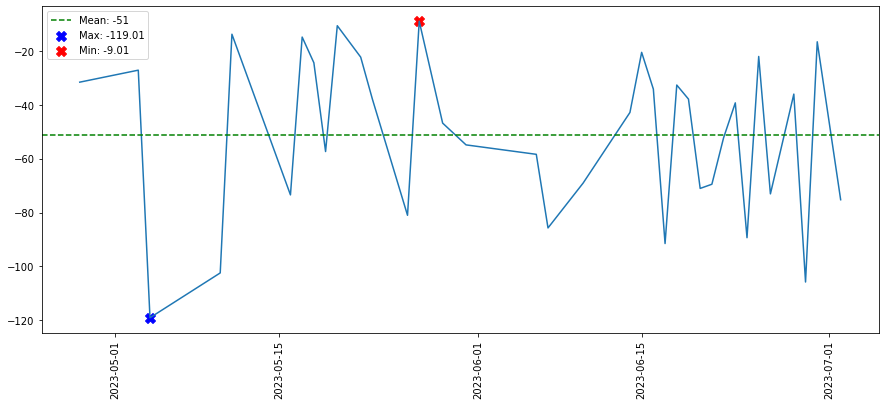

In [591]:
plt.figure(figsize = (15,6))
plt.plot(df_no_outliers["Buchungstag"],df_no_outliers["Betrag"])
plt.scatter(max_point["Buchungstag"], max_point["Betrag"], color='blue', marker='X', s=100, label=f'Max: {max_point["Betrag"].values[0]}')
plt.scatter(min_point["Buchungstag"], min_point["Betrag"], color='red',  marker='X', s=100, label=f'Min: {min_point["Betrag"].values[0]}')
plt.axhline(y=av_expense, color='green', linestyle='--', label=f'Mean: {round(av_expense)}')

plt.legend()
plt.xticks(rotation = 'vertical')
plt.show()

In [593]:
df_no_outliers.describe()

,Betrag
count,36.000000
mean,-51.386111
std,29.819664
min,-119.010000
25%,-73.155000
50%,-44.835000
75%,-26.485000
max,-9.010000


In [561]:
top_expenses = pd.DataFrame(df_expenses.groupby(['Verwendungszweck']).sum()['Betrag'])
top_expenses.sort_values('Betrag')

Betrag
Kategorie     Verwendungszweck                                          
unterkunft    selina                                             -632.85
aktivitäten   pantanal sul turismo                               -355.65
transport     merpago brivalspa                                  -204.15
extras        1026612130524  . hansemerkur versicherungen gbr... -155.40
essen         frankfurt airport r/frankfurt/de               ... -151.60
              the singular stgo bar                              -102.39
transport     aerolineas argentinas                               -83.20
aktivitäten   the singular patagonia                              -81.01
unterkunft    hotel mohave                                        -69.42
              av. vinte de janeiro, 8                             -66.09
transport     eucard                                              -64.52
extras        litori armacao dos buz                              -61.37
aktivitäten   getyourguide                                        -58.39
transport     prainha agencia de vi                               -57.17
unterkunft    casavoyage                                          -57.10
extras        1026568210959 pp.1548.pp . , ihr einkauf bei er...  -56.00
essen         fogo botafogo                                       -51.40
Finanzen      pag mepayfinancial                                  -50.89
unterkunft    hostel gorilla                                      -47.93
extras        dayana coromoto del v                               -47.82
apotheke      grueneburg-apotheke/frankfurt am main/de       ...  -42.30
essen         super muffato boicy                                 -42.00
              linier                                              -41.36
aktivitäten   punta arenas centro                                 -37.93
essen         cantina pelicano                                    -31.62
aktivitäten   to lydia melvin                                     -31.14
essen         oia                                                 -30.06
aktivitäten   pampa expedition                                    -29.64
              pag floripasurfclubsu                               -28.79
extras        pag hotelplaza                                      -28.56
essen         el patio juice coff                                 -28.14
apotheke      metropolitan pharmacy/frankfurt/de             ...  -26.95
essen         rancho de canoa                                     -24.02
extras        hym marina arauco                                   -23.27
essen         starbucks                                           -22.34
transport     1001 ag 27001 rod no                                -19.84
drogeriemarkt dm fil.1212 h:65205/frankfurt/de               ...  -19.30
transport     posto formula foz                                   -19.12
              auto viação 1001                                    -18.83
essen         redelco el deseo spa                                -18.67
transport     turbus web 2                                        -18.07
essen         burgers rio ipanema                                 -17.51
extras        1026590717741 pp.1548.pp . airgsm pte. ltd., ih...  -17.14
essen         artesano pizza bar                                  -17.11
unterkunft    hostelworld.com                                     -16.82
essen         thai thai                                           -16.46
              dabosh tel aviv            isr tel aviv        ...  -16.36
              de frente bar e brasa                               -16.20
              meyer feinkost airport gmbh gir 69084862/frankf...  -15.95
              las deliciosas                                      -13.65
aktivitäten   costanera center                                    -13.52
essen         pag mauroalonsocoutin                               -12.89
extras        mormaii lagoa                                       -12.43
              mercadopago marianore1942            

In [583]:
accomodation_costs = pd.DataFrame(df_expenses[df_expenses['Kategorie'] == 'unterkunft'].groupby('Verwendungszweck').sum()['Betrag'])
accomodation_costs.sort_values('Betrag')

,Betrag
Verwendungszweck,
selina,-632.85
hotel mohave,-69.42
"av. vinte de janeiro, 8",-66.09
casavoyage,-57.10
hostel gorilla,-47.93
hostelworld.com,-16.82
petrobras,-10.19
pao de acucar 1414,-9.20
hilton,-8.20
